### Plot comparison of chronic data to public acute dataset
- plot MAD of the sites
- plot rasters
- plot dredge motion
- spike amplitude violin plots
- single unit yield

In [2]:
import labdatatools as ldt
from spks import *
import numpy as np
from pathlib import Path
from dredge.dredge_ap import register
from dredge.motion_util import plot_me_traces


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})

c:\Users\mmelin\anaconda3\envs\spks\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [3]:
DATAPATH = Path(ldt.labdata_preferences['paths'][0])
SAVEPATH = Path.home() / 'chronic_manuscript_figures'

SUBJECTS = ['CSH_ZAD_026','CSH_ZAD_026','MM008','MM008','MM012','MM012']
SESSIONS = ['2020-08-15/001',
            '2020-08-19/001',
            '2023-03-23/001',
            '2023-06-09/001',
            '2023-08-15/001',
            '2023-10-25/003']

sorting_paths = [[['X:/labdatatools_data/CSH_ZAD_026/2020-08-15/001/spike_sorters/kilosort2.5_no_motion_corr/imec0']],
                [['X:/labdatatools_data/CSH_ZAD_026/2020-08-19/001/spike_sorters/kilosort2.5_no_motion_corr/imec0']],
                [['X:/labdatatools_data/MM008/2023-03-23/001/spike_sorters/kilosort2.5_no_motion_corr/imec1']],
                [['X:/labdatatools_data/MM008/2023-06-09/001/spike_sorters/kilosort2.5_no_motion_corr/imec1']],
                [['X:/labdatatools_data/MM012/2023-08-15/001/spike_sorters/kilosort2.5_no_motion_corr/imec1']],
                [['X:/labdatatools_data/MM012/2023-10-25/003/spike_sorters/kilosort2.5_no_motion_corr/imec1']]] #TODO: add steinmetz dataset?

binfiles = [[['X:/labdatatools_data/CSH_ZAD_026/2020-08-15/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.cbin']],
                [['X:/labdatatools_data/CSH_ZAD_026/2020-08-19/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.cbin']],
                [['X:/labdatatools_data/MM008/2023-03-23/001/raw_ephys_data/probe01/_spikeglx_ephysData_g0_t0.imec1.ap.cbin']],
                [['X:/labdatatools_data/MM008/2023-06-09/001/raw_ephys_data/probe01/_spikeglx_ephysData_g0_t0.imec1.ap.cbin']],
                [['X:/labdatatools_data/MM012/2023-08-15/001/raw_ephys_data/probe01/_spikeglx_ephysData_g0_t0.imec1.ap.cbin']],
                [['X:/labdatatools_data/MM012/2023-10-25/003/raw_ephys_data/probe01/_spikeglx_ephysData_g0_t0.imec1.ap.cbin']]]

labels = ['Acute session 1',
          'Acute session 2',
          'Chronic implant 1\nWeek 1',
          'Chronic implant 1\nWeek 11',
          'Chronic implant 2\nWeek 1',
          'Chronic implant 2\nWeek 10']
pal = ['tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:purple','tab:purple']

In [4]:
#for sub,sess in zip(SUBJECTS,SESSIONS):
#    ldt.rclone_get_data(subject=sub, session=sess, datatype='spike_sorters/kilosort2.5_no_motion_corr', excludes=['*.bin'])
#    ldt.rclone_get_data(subject=sub, session=sess, datatype='raw_ephys_data',excludes=['*.bin','*.lf*bin'])

In [5]:
MAXDEPTH = 60000 #Truncate "spikes" that are outside of the brain
session_ests, session_clus = [],[]
for i,session_prb_paths in enumerate(sorting_paths):
    prb_clus = []
    prb_ests = []
    for j,shank_path in enumerate(session_prb_paths):
        
        shank_path = shank_path[0]
        print(shank_path)
        clu = Clusters(shank_path, load_template_features=True)
        prb_clus.append(clu)

        times = clu.spike_times/clu.sampling_rate
        depths = clu.spike_positions[:,1]
        amps = clu.spike_amplitudes 
        
        times = times[depths < MAXDEPTH]
        amps = amps[depths < MAXDEPTH]
        depths = depths[depths < MAXDEPTH]
        
        #motion_est, extra_info = register(amps, depths, times)
        motion_est, extra_info = register(amps, depths, times, win_scale_um=300, win_step_um=200)
        prb_ests.append(motion_est)
        
    session_clus.append(prb_clus)
    session_ests.append(prb_ests)

X:/labdatatools_data/CSH_ZAD_026/2020-08-15/001/spike_sorters/kilosort2.5_no_motion_corr/imec0


Cross correlation:   0%|          | 0/18 [00:00<?, ?it/s]

Solve:   0%|          | 0/17 [00:00<?, ?it/s]

X:/labdatatools_data/CSH_ZAD_026/2020-08-19/001/spike_sorters/kilosort2.5_no_motion_corr/imec0


Cross correlation:   0%|          | 0/18 [00:00<?, ?it/s]

Solve:   0%|          | 0/17 [00:00<?, ?it/s]

X:/labdatatools_data/MM008/2023-03-23/001/spike_sorters/kilosort2.5_no_motion_corr/imec1


Cross correlation:   0%|          | 0/18 [00:00<?, ?it/s]

Solve:   0%|          | 0/17 [00:00<?, ?it/s]

X:/labdatatools_data/MM008/2023-06-09/001/spike_sorters/kilosort2.5_no_motion_corr/imec1


Cross correlation:   0%|          | 0/18 [00:00<?, ?it/s]

Solve:   0%|          | 0/17 [00:00<?, ?it/s]

X:/labdatatools_data/MM012/2023-08-15/001/spike_sorters/kilosort2.5_no_motion_corr/imec1


Cross correlation:   0%|          | 0/18 [00:00<?, ?it/s]

Solve:   0%|          | 0/17 [00:00<?, ?it/s]

X:/labdatatools_data/MM012/2023-10-25/003/spike_sorters/kilosort2.5_no_motion_corr/imec1


Cross correlation:   0%|          | 0/18 [00:00<?, ?it/s]

Solve:   0%|          | 0/17 [00:00<?, ?it/s]

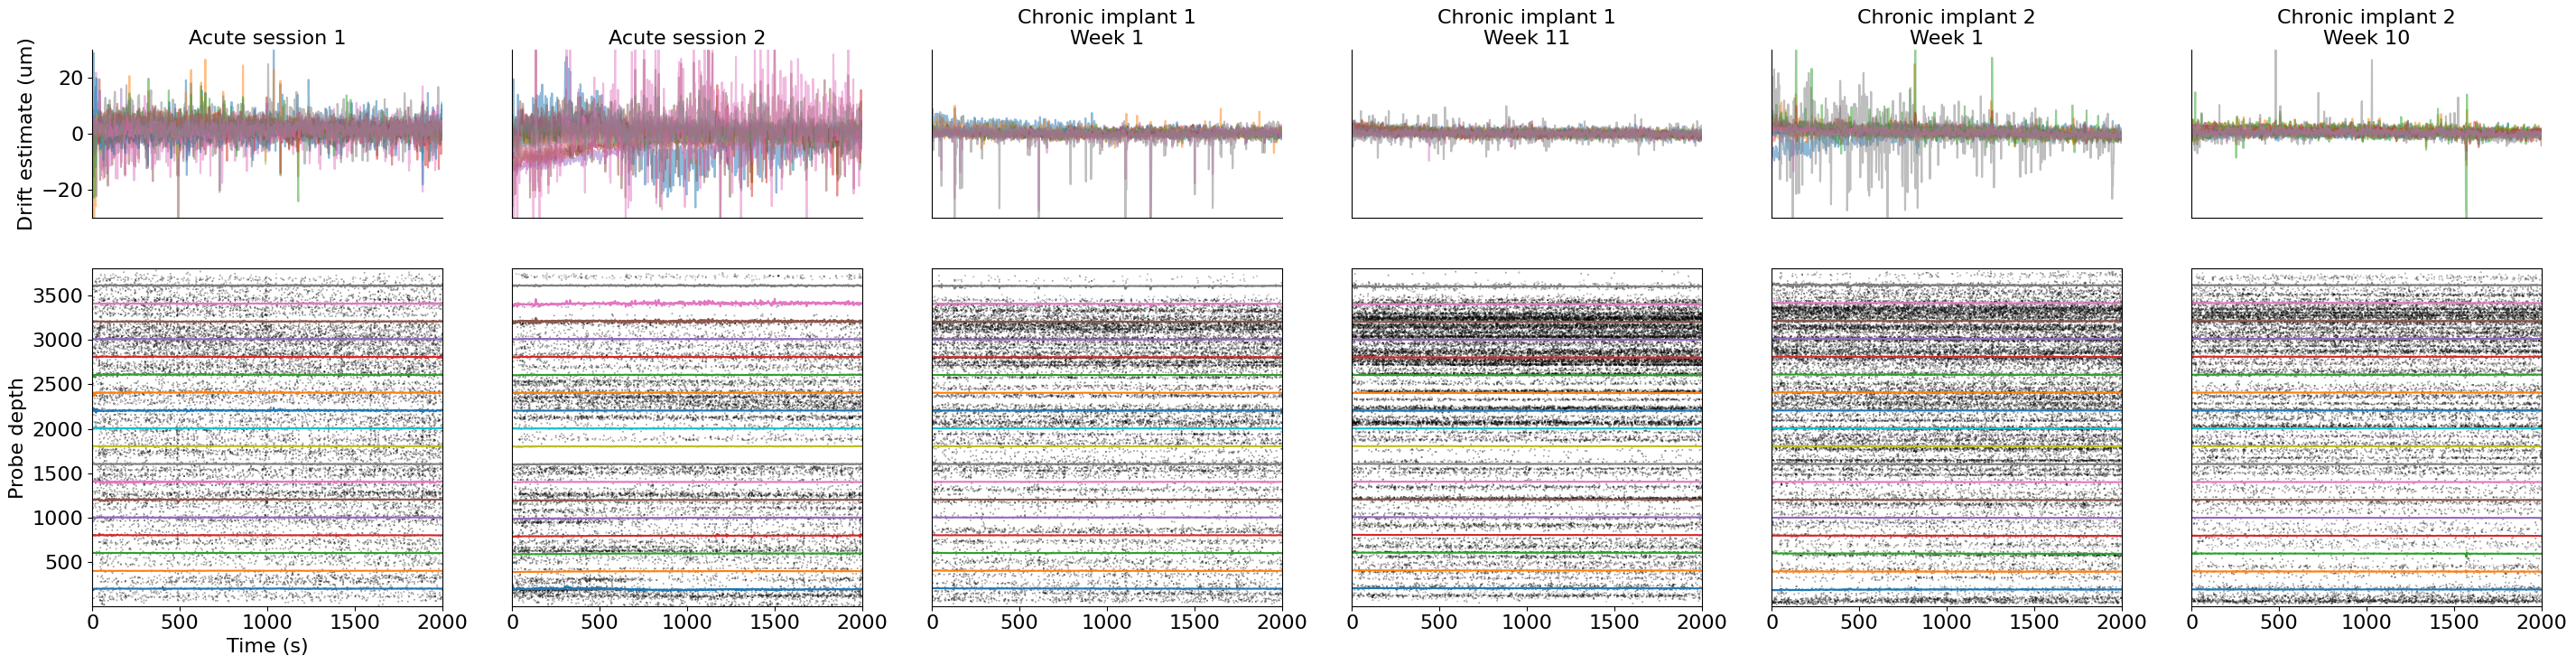

In [6]:
# Plot driftmap
import matplotlib.pyplot as plt
from matplotlib import gridspec

ns = len(session_ests)
spec = gridspec.GridSpec(ncols=ns, nrows=2,
                         width_ratios=[1]*ns, wspace=.2,
                         hspace=.2,height_ratios=[1,2])
fig = plt.figure(figsize=(35,8))

for isess, (shank_clus,shank_ests) in enumerate(zip(session_clus, session_ests)):
    tidxs, idxs, sps, depths, amps = [],[],[],[],[]
    for ishank,(clu,motion_est) in enumerate(zip(shank_clus,shank_ests)):
        sp = clu.spike_times/clu.sampling_rate
        d = clu.spike_positions[:,1]
        amps.append(clu.spike_amplitudes[d < MAXDEPTH])
        sps.append(sp[d < MAXDEPTH])
        depths.append(d[d < MAXDEPTH])
    sps = np.hstack(sps)
    depths = np.hstack(depths)
    amps = np.hstack(amps)

    fig.add_subplot(spec[ns+isess]) #TODO: shorten the xlims so they're the same
    plot_drift_raster(sps,
                    depths,
                    amps,n_spikes_to_plot=50000,clim=[0, 500],cmap='gray_r', rasterized=True)
    plt.plot(motion_est.time_bin_centers_s, motion_est.displacement.T + motion_est.spatial_bin_centers_um)

    xlims=[0,2000]
    if isess==0:
        plt.ylabel('Probe depth')
        plt.xlabel('Time (s)')
    else:
        plt.yticks([])
    plt.xlim(xlims)

    fig.add_subplot(spec[isess])
    plt.plot(motion_est.time_bin_centers_s,motion_est.displacement.T,alpha=.5)

    plt.xticks([])
    plt.xlim(xlims)
    plt.ylim([-30, 30])
    if isess==0:
        plt.ylabel('Drift estimate (um)')
    else:
        plt.yticks([])
    plt.xlabel(labels[isess])
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().spines[['right', 'top']].set_visible(False)

plt.savefig(SAVEPATH / 'acute_chronic_rasters.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig(SAVEPATH / 'acute_chronic_rasters.png', format='png', dpi=500)

In [7]:
# Quantify DREDGE traces
all_var = []
for isess, (shank_clus,shank_ests) in enumerate(zip(session_clus, session_ests)):
    sess_var = []
    for ishank,motion_est in enumerate(shank_ests):
        motion = motion_est.displacement
        if motion.ndim == 1:
            motion = np.expand_dims(motion,0)
        #variance = np.var(motion,axis=1)
        variance = np.std(motion,axis=1)
        #variance = np.mean(np.abs(np.diff(motion, axis=1)), axis=1)
        sess_var.extend(variance)
    all_var.append(sess_var)
all_var = np.stack(all_var)

In [8]:
all_var.shape

(6, 18)

In [33]:
all_var
from scipy import stats
for i in range(all_var.shape[0]):
    for j in range(i, all_var.shape[0]):
        if i==j:
            continue
        #t, p = stats.ttest_rel(all_var[i,:],all_var[j,:])
        #t, p = stats.ks_2samp(all_var[i,:],all_var[j,:])
        t, p = stats.mannwhitneyu(all_var[i,:],all_var[j,:])
        print(f'p value for indices {i} {j}: {p}')

p value for indices 0 1: 0.812432208131742
p value for indices 0 2: 3.646023071889957e-05
p value for indices 0 3: 2.245522664128868e-06
p value for indices 0 4: 0.00750728508117237
p value for indices 0 5: 5.485365379762547e-05
p value for indices 1 2: 2.7636646531024946e-05
p value for indices 1 3: 1.4008303282999302e-06
p value for indices 1 4: 0.005110005987414057
p value for indices 1 5: 9.330734066373957e-05
p value for indices 2 3: 0.537265926636113
p value for indices 2 4: 0.002515370339191523
p value for indices 2 5: 0.35064512183188634
p value for indices 3 4: 0.0010581352212983269
p value for indices 3 5: 0.41979076804604143
p value for indices 4 5: 0.05976860866093005


[(2.555994135874716, 4.728517972091936), (2.353480355188754, 4.579511813859969), (0.8119146446464562, 1.5823608948600045), (0.8775070987332436, 1.2193549865695734), (1.3344698224573577, 2.370157605366132), (0.9671794867945646, 1.606017192120325)]


C:\Users\mmelin\AppData\Local\Temp\ipykernel_57624\369541555.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)


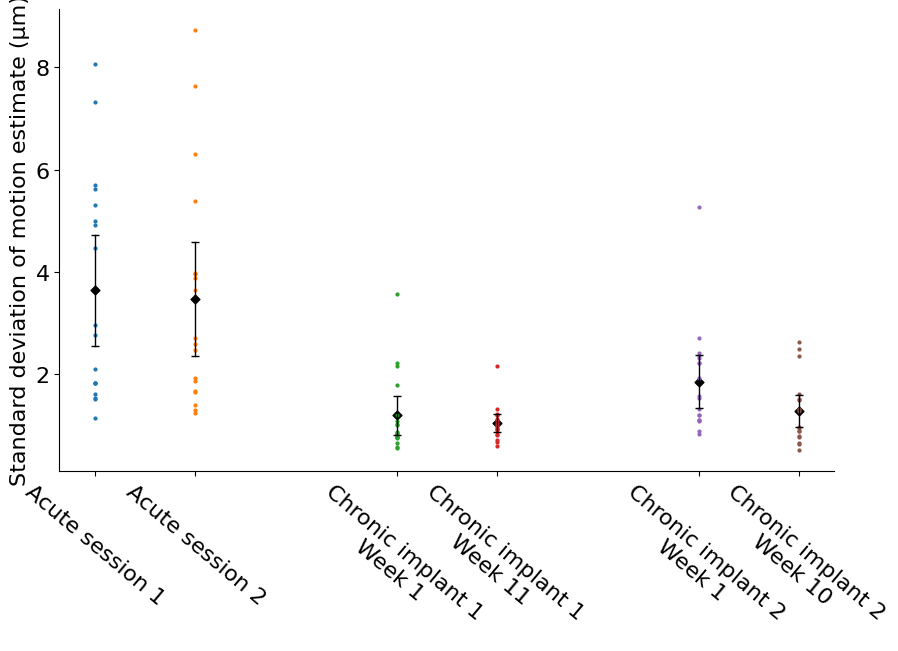

In [ ]:
xvals = [0, .5, 1.5, 2, 3, 3.5]
#error = [np.std(i) / np.sqrt(len(i)) for i in all_var] # SEM
import scipy.stats as st
ci_95 = [st.t.interval(.95, df=len(d)-1, loc=np.mean(d), scale=st.sem(d))  for d in all_var] # create 95% confidence interval 
print(ci_95)
fig = plt.figure(figsize=(10,6))

#plt.errorbar(xvals, np.mean(all_var, axis=1), yerr=ci_95, markersize=5, capsize=8, marker='D', linestyle='none', color='black')
plt.scatter(xvals, np.mean(all_var, axis=1), s=20, marker='D', color='black')
for i,e in enumerate(ci_95):
    plt.plot(xvals[i]*np.array([1,1]),e,'_-',lw=1,color='black')
for i,x in enumerate(xvals):
    plt.scatter([x]*len(all_var[i]), all_var[i], s=4)

plt.gca().set_xticklabels(labels)
plt.ylabel('Standard deviation of motion estimate (μm)')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.xticks(xvals, labels, rotation=-40)

plt.savefig(SAVEPATH / 'quantify_dredge_traces.pdf', format='pdf', dpi=500, bbox_inches='tight')

In [ ]:
import seaborn as sns
import pandas as pd
# plot amplitudes of units for each recording, along with number of single units
dat = pd.DataFrame()
n_mua, n_single = [],[]
for isess, shank_clus in enumerate(session_clus):
    all_amps, all_single_units = [],[]
    for ishank,clu in enumerate(shank_clus):
        n_total_units= np.sum(clu.cluster_info.n_active_channels<40)
        n_total_units= len(clu)
        single_units  = ((np.abs(clu.cluster_info.trough_amplitude)>25) &
                          (clu.cluster_info.amplitude_cutoff<0.1) & 
                          (clu.cluster_info.isi_contamination<0.1))
    
        amps = np.abs(clu.trough_amplitude)
        all_amps.append(amps)
        all_single_units.append(single_units)

    all_amps = np.hstack(all_amps)
    all_single_units = np.hstack(all_single_units)
    n_single.append(np.sum(all_single_units))
    n_mua.append(np.sum(~all_single_units))

    sess = [labels[isess]] * len(all_amps)
    dat = pd.concat([dat, pd.DataFrame(zip(all_amps, all_single_units, sess))])
dat.columns = ['amps','single unit','sess']

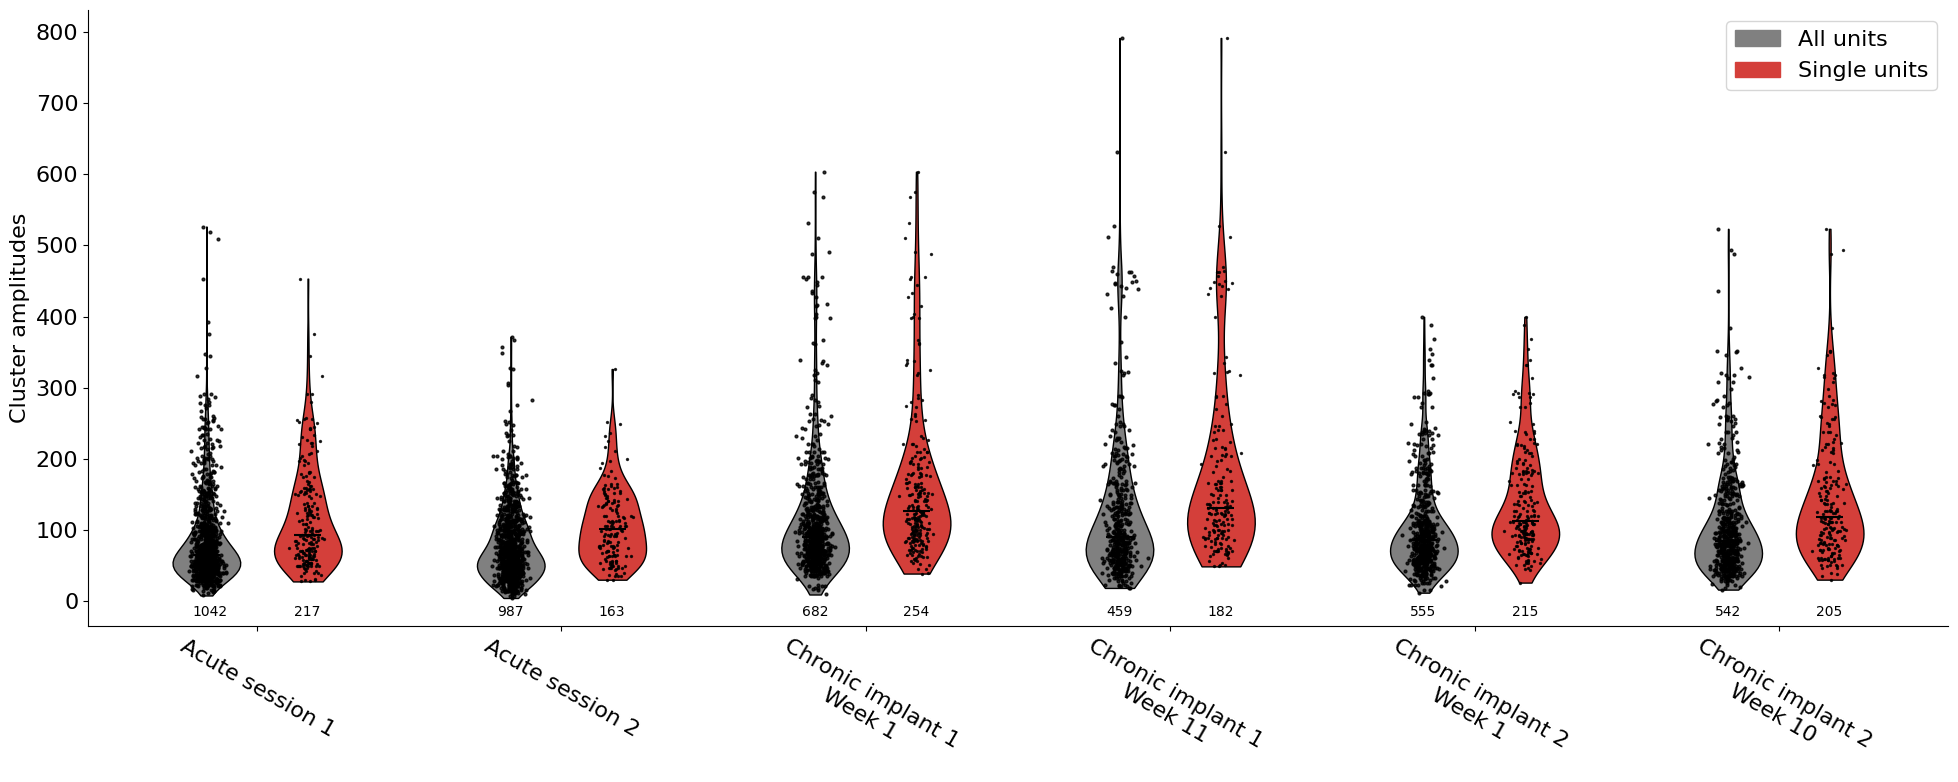

In [ ]:
import matplotlib.patches as mpatches
x = 0
fdict = {'size': 10}
leg_labels, xticks = [],[]
sessions = [t for _,t in dat.groupby(dat['sess'])]

fig = plt.figure(figsize=(24,8))
for i,s in enumerate(sessions):
    all_amps = s.amps
    su_amps = s.amps[s['single unit']].values

    scatter_positions = np.random.normal(x, scale=.05, size=len(all_amps))
    parts = plt.violinplot([all_amps], [x], showmedians=False, showextrema=False) 
    plt.scatter(scatter_positions, all_amps, color='black',s=4, alpha=.8)
    plt.hlines(np.median(all_amps), x-.1, x+.1, color='black')
    plt.text(x-.1,-20,f'{len(all_amps)}',fontdict=fdict)
    xticks.append(x+.75/2)
    x += .75

    for pc in parts['bodies']:
        pc.set_facecolor('grey')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    if i==0:
        color = parts['bodies'][0].get_facecolor().flatten()
        leg_labels.append((mpatches.Patch(color=color), 'All units'))

    scatter_positions = np.random.normal(x, scale=.05, size=len(su_amps))
    parts = plt.violinplot([su_amps], [x], showmedians=False, showextrema=False)
    plt.scatter(scatter_positions, su_amps, color='black',s=2, alpha=.8)
    plt.hlines(np.median(su_amps), x-.1, x+.1, color='black')
    plt.text(x-.1,-20,f'{len(su_amps)}',fontdict=fdict)
    x += 1.5

    for pc in parts['bodies']:
        pc.set_facecolor('#D43F3A')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    if i==0:
        color = parts['bodies'][0].get_facecolor().flatten()
        leg_labels.append((mpatches.Patch(color=color), 'Single units'))


plt.xticks(xticks, labels)
plt.xticks(rotation=-30)
plt.ylabel('Cluster amplitudes')
plt.xlabel('')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.legend(*zip(*leg_labels), loc = 1)

plt.savefig(SAVEPATH / 'acute_chronic_amps.pdf', format='pdf', dpi=500, bbox_inches='tight')

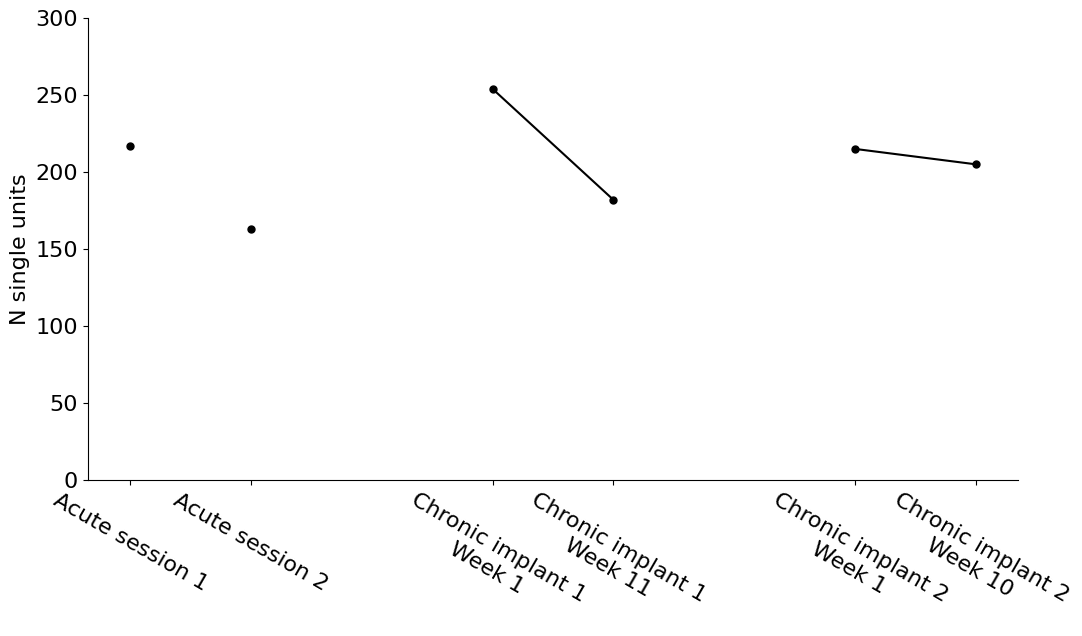

In [ ]:
# Plot n single units
fig = plt.figure(figsize=(12,6))
xvals = [0,.5, 1.5, 2, 3, 3.5]

all,su = [],[]
for i,s in enumerate(sessions):
    all.append(len(s.amps))
    su.append(len(s.amps[s['single unit']].values))

plt.scatter(xvals, su, color='black', s=25)
plt.plot(xvals[2:4], su[2:4], color='black')
plt.plot(xvals[4:6], su[4:6], color='black')

plt.ylim([0,300])
plt.xticks(xvals, labels)
plt.xticks(rotation=-30)
plt.ylabel('N single units')
plt.xlabel('')
plt.gca().spines[['right', 'top']].set_visible(False)

plt.savefig(SAVEPATH / 'acute_chronic_n_single_units.pdf', format='pdf', dpi=500, bbox_inches='tight')


In [ ]:
# Plot MAD for each channel
from mtscomp import decompress

#binfiles = [list_spikeglx_binary_paths(DATAPATH / sub / sess) for sub, sess in zip (SUBJECTS,SESSIONS)]

allmads = {}
for isess, (shank_clus,sess_files) in enumerate(zip(session_clus,binfiles)):
    sess_files = [item for sublist in sess_files for item in sublist] # flatten
    #fig.add_subplot(1,len(session_clus),isess+1)
    mads = []
    for ishank,(clu,bfile) in enumerate(zip(shank_clus,sess_files)):
        #mad = clu.metadata['channel_mad_int16'].astype(float) * clu.metadata['channel_conversion_factor'].flatten()
        if '.cbin' in bfile:
            rr = decompress(Path(bfile))
        else:
            rr = map_binary((Path(bfile)),385)
            
        #rr = RawRecording([bfile],return_voltage=True)
        gain = clu.metadata['channel_conversion_factor'][clu.channel_map].flatten() #TODO: double check this
        chunk = rr[int(30_000*100):int(30_000*130),clu.channel_map].astype(np.float32)
        tt = bandpass_filter_gpu(chunk,30000,300,10000)
        chunk = global_car_gpu(tt,return_gpu=False)
        m = mad(chunk * gain).flatten() 
        mads.append(m)
    mads = np.hstack(mads)
    allmads.update({labels[isess]: mads})

allmads = pd.DataFrame(allmads)

c:\data\churchland\spks\spks\raw.py:26: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3575.)
  T = torch.from_numpy(chunk.astype('float32')).T.to(device)


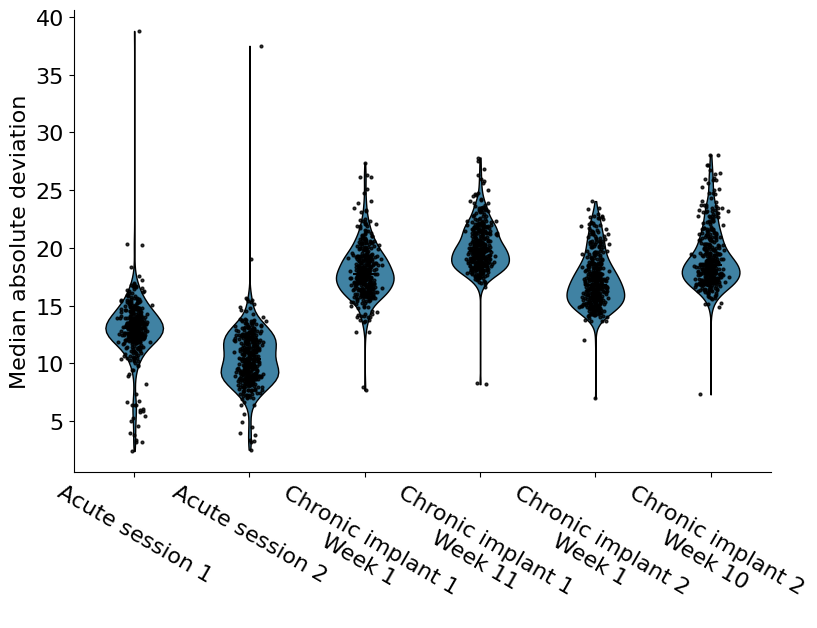

In [ ]:
fig = plt.figure(figsize=(9,6))
xvals = [1,2,3,4,5,6]
parts = plt.violinplot(allmads.values, xvals, showmedians=False, showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#4082a3')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

for i,x in enumerate(xvals):
    scatter_positions = np.random.normal(x, scale=.05, size=allmads.values[:,i].size)
    plt.scatter(scatter_positions, allmads.values[:,i], color='black',s=4, alpha=.8)
    plt.hlines(np.median(allmads.values[:,i]), x-.1, x+.1, color='black')

plt.xticks(xvals, labels)
plt.ylabel('Median absolute deviation')
plt.xlabel('')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.xticks(rotation=-30)

plt.savefig(SAVEPATH / 'acute_chronic_mad.pdf', format='pdf', dpi=500, bbox_inches='tight')